In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import larp
import larp.io as lpio

In [2]:
field = lpio.loadRGeoJSONFile("docs/demos/Hot Reloading in Room/walled_room.rgj", size_offset=10)

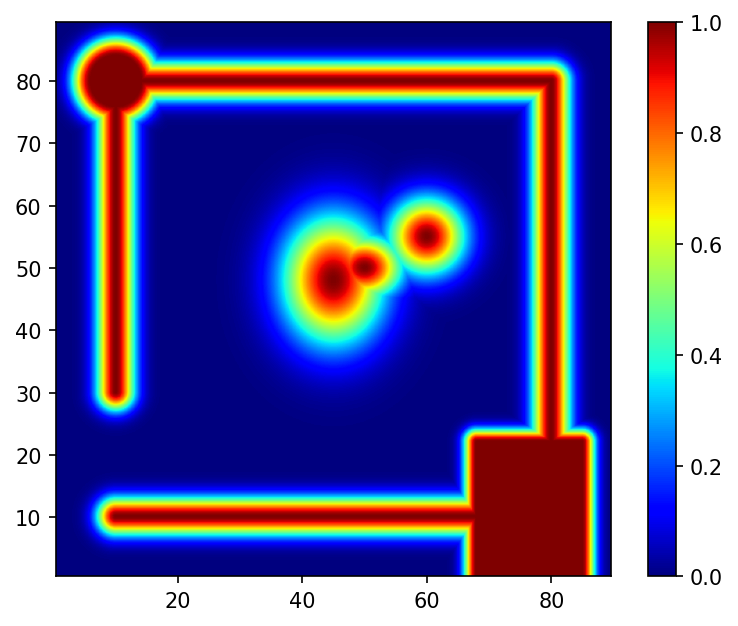

In [3]:
display = field.to_image(resolution=400, center_point=[45, 45])

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar()
plt.clim(0.0,1.0)
plt.show()

In [4]:
edges = [0.1, 0.2, 0.4, 0.6, 0.8]

# maximum_size_limit, minimum_size_limit, upper_bounds (adds 1.0 as the up most bound)
quadtree = larp.quad.QuadTree(field, minimum_length_limit=1, maximum_length_limit=10, edge_bounds=edges, conservative=False)
%time quadtree.build()

CPU times: total: 266 ms
Wall time: 977 ms


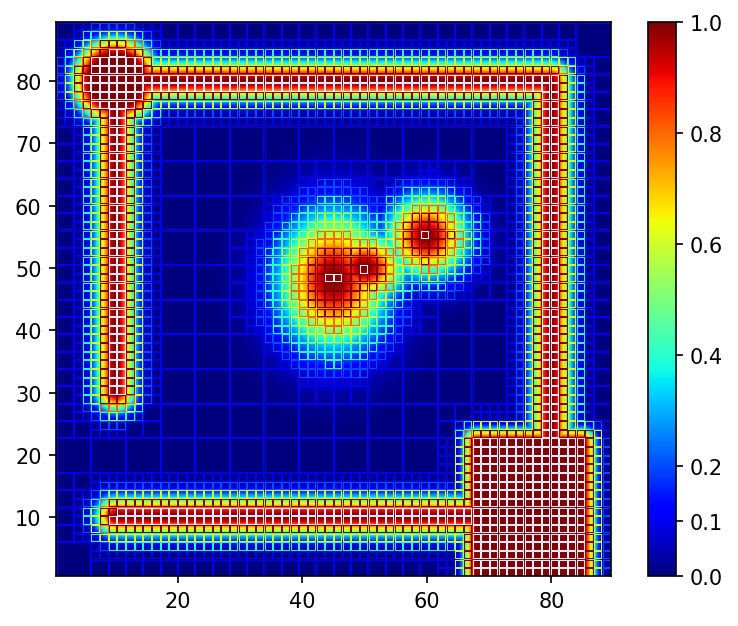

In [5]:
edge_bounds_lines = quadtree.to_boundary_lines_collection(margin=0.1)
edge_bounds_lines_zones = quadtree.get_quad_zones()


plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(edge_bounds_lines), 2):
    zone = edge_bounds_lines_zones[i//2]
    c = cm.jet(quadtree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*edge_bounds_lines[i:i+2], c=c, alpha=1, linewidth=0.5)
plt.show()

In [6]:
routing_network = larp.network.RoutingNetwork(quadtree=quadtree, build_network=False)
%time routing_network.build()

CPU times: total: 31.2 ms
Wall time: 61.7 ms


In [7]:
loader = larp.hl.HotLoader(field, quadtree, routing_network)
%time added_idx = loader.addRGJ(larp.PointRGJ((40, 40), repulsion=[[10, 0], [0, 10]]))

CPU times: total: 0 ns
Wall time: 45 ms


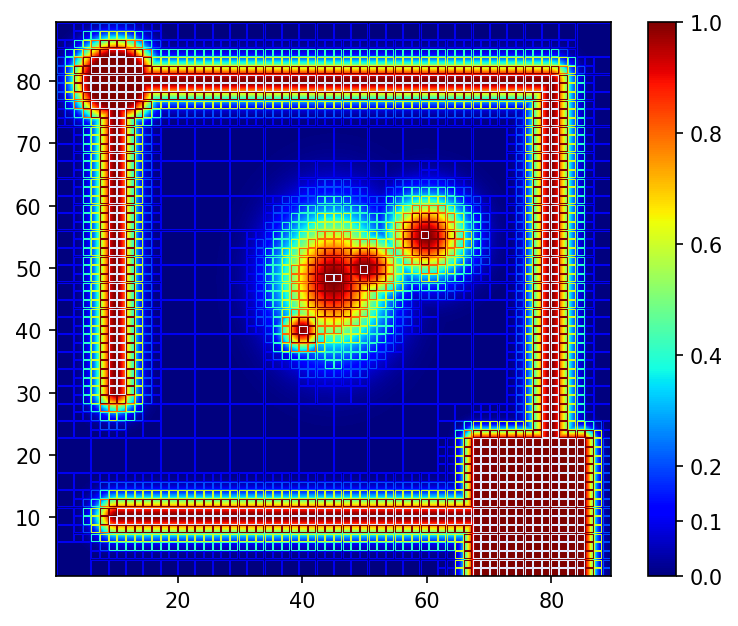

In [8]:
display = field.to_image(resolution=400, center_point=[45, 45])
edge_bounds_lines = quadtree.to_boundary_lines_collection(margin=0.1)
edge_bounds_lines_zones = quadtree.get_quad_zones()


plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(edge_bounds_lines), 2):
    zone = edge_bounds_lines_zones[i//2]
    c = cm.jet(quadtree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*edge_bounds_lines[i:i+2], c=c, alpha=1, linewidth=0.5)
plt.show()

In [9]:
%time loader.removeRGJ(2)

CPU times: total: 62.5 ms
Wall time: 402 ms


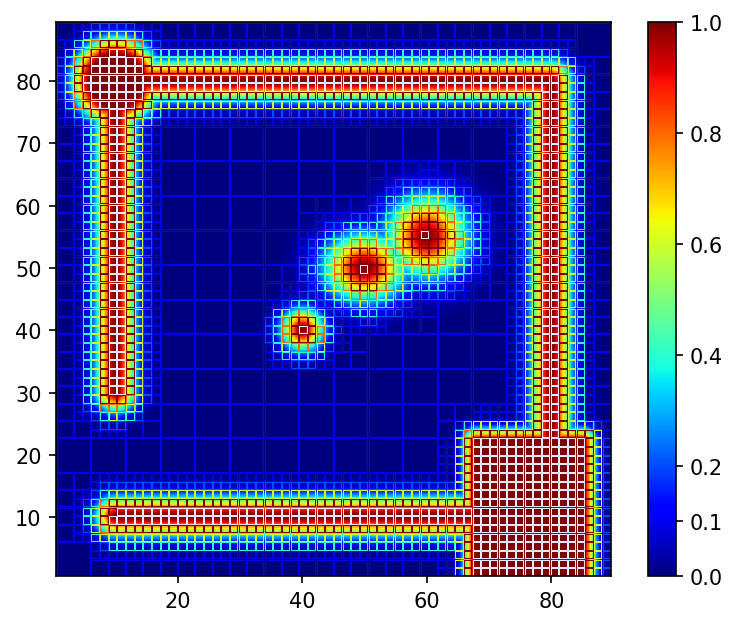

In [10]:
display = field.to_image(resolution=400, center_point=[45, 45])
edge_bounds_lines = quadtree.to_boundary_lines_collection(margin=0.1)
edge_bounds_lines_zones = quadtree.get_quad_zones()


plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(edge_bounds_lines), 2):
    zone = edge_bounds_lines_zones[i//2]
    c = cm.jet(quadtree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*edge_bounds_lines[i:i+2], c=c, alpha=1, linewidth=0.5)
plt.show()